Finding the screen containing images on a picture showing a monitoring device

In [1]:
# import the necessary packages
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import argparse

In [2]:
data = pd.read_csv('HQ_quality.csv', sep=';', index_col=0)

0


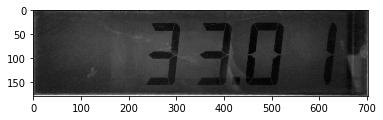

1


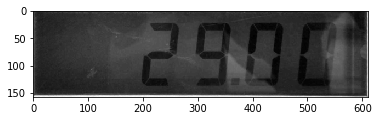

2


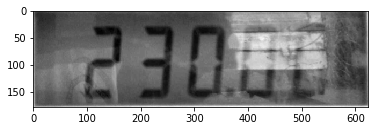

3


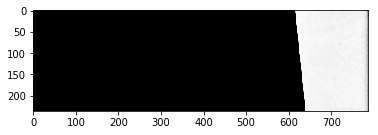

4
5


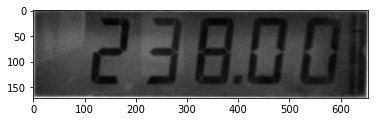

6
7


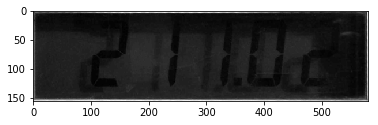

8


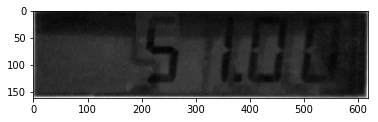

9


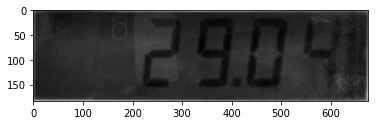

10
11


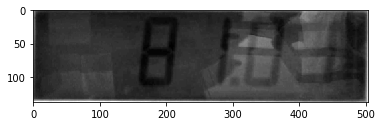

12


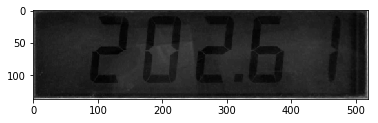

13


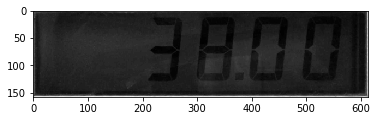

14


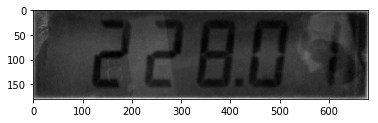

15


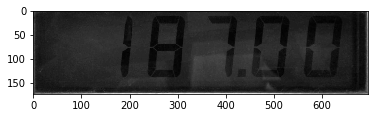

16


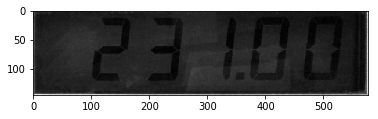

17


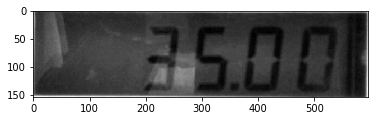

18


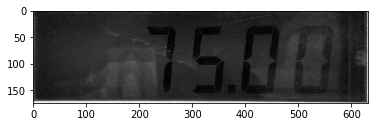

19


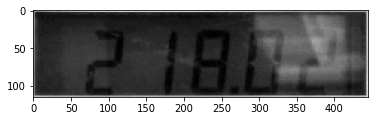

20
21


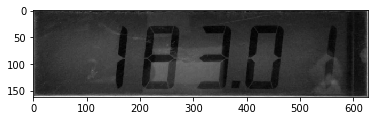

22
23


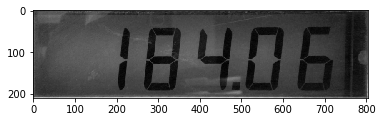

24


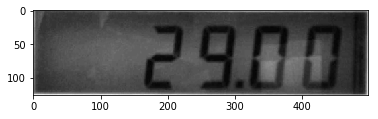

25


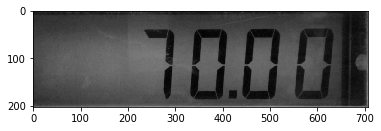

26


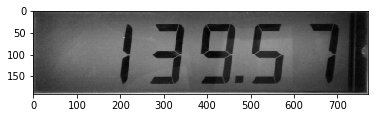

27


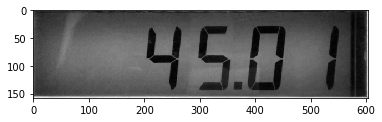

28


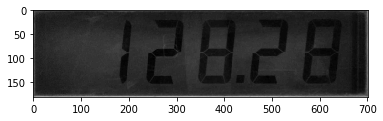

29


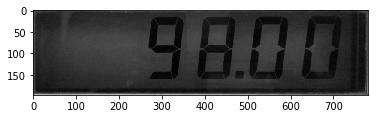

30
31


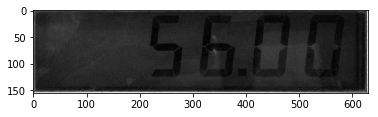

32


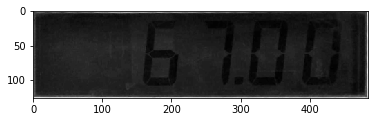

33


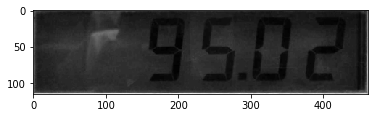

34


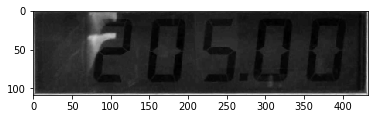

35


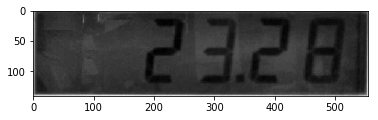

36


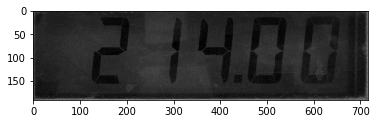

37


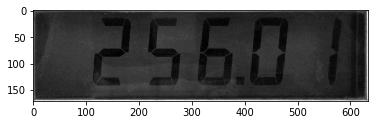

38


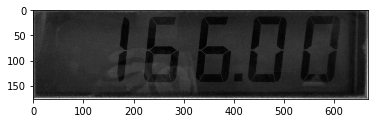

39


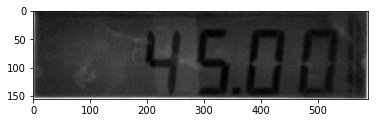

40


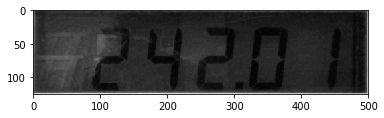

41


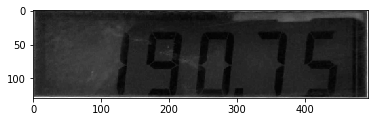

42


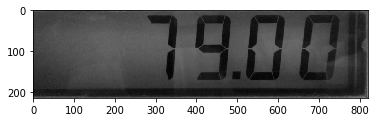

43


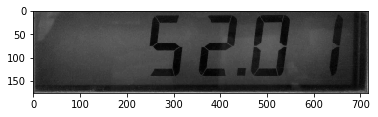

44


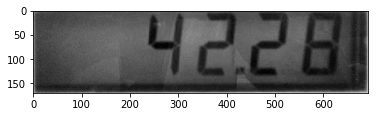

45


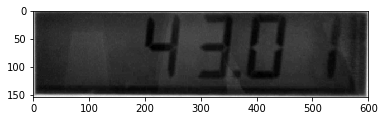

46


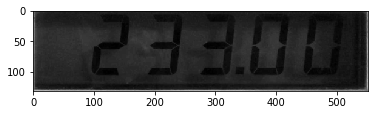

47


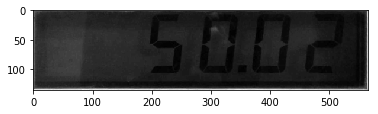

48


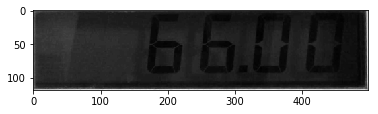

49


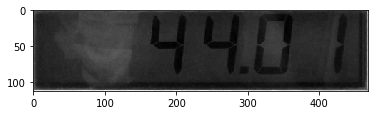

50


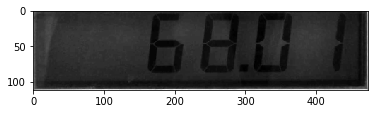

51


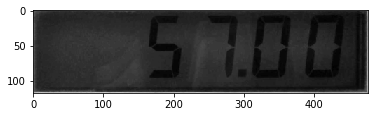

52


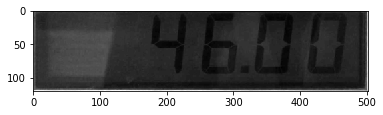

53


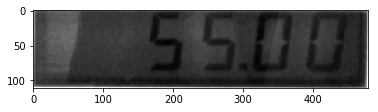

54


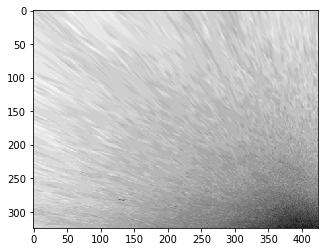

55


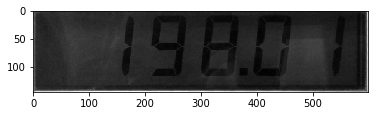

56


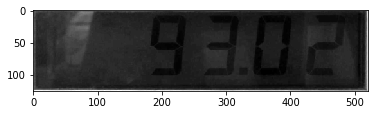

57


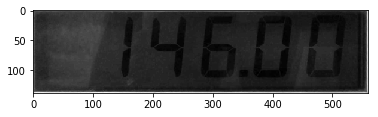

58


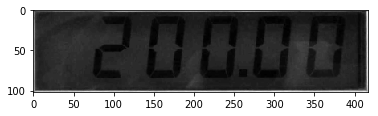

59


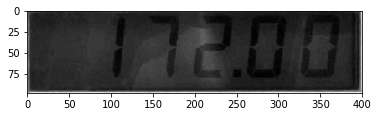

60


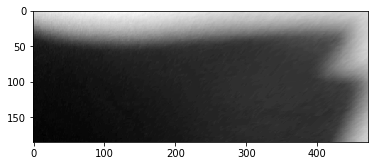

61


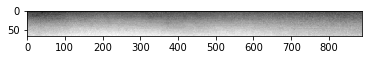

62


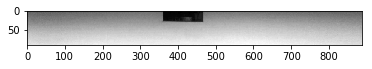

63


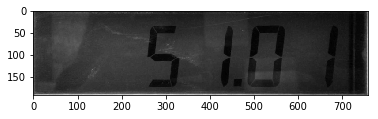

64


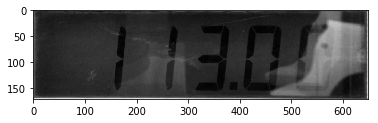

65


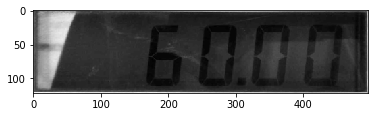

66


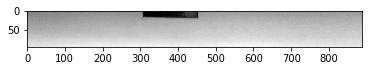

67


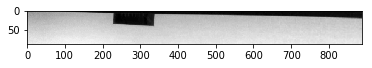

68


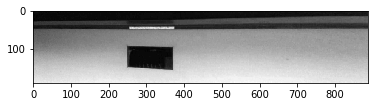

69


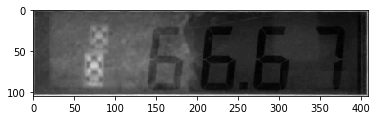

70


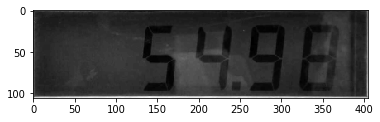

71


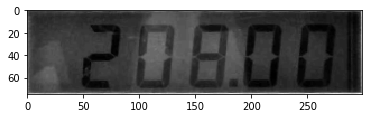

72
73


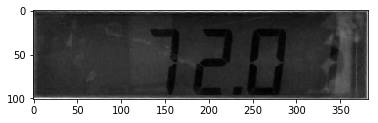

74


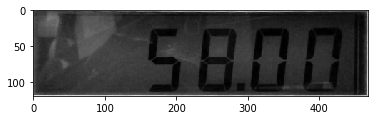

75


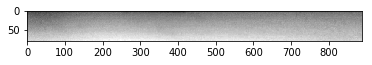

76


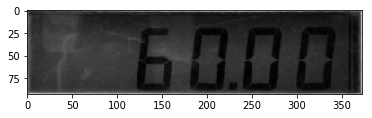

77


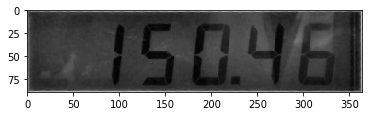

78


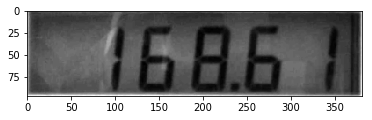

79
80


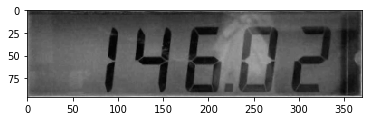

81


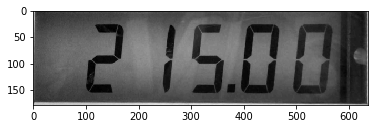

In [ ]:
counter = 0
for i in range(data.shape[0]):
    print(i)
    image_name = 'HQ_digital/' + data.loc[i, 'image']
        # load the image
    image = cv2.imread(image_name)
    image = imutils.resize(image.copy(), height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,127,255,1)
    a,cnts,h = cv2.findContours(thresh,1,2)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None

    for cnt in cnts:
        approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
        if len(approx)==4 and cv2.contourArea(approx) > 100*200 :
            warped = four_point_transform(gray, approx.reshape(4, 2))
            counter += 1
            plt.imshow(warped,cmap = 'gray')
            plt.show()
            break